In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

# Central Tendency

In [3]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


convert height and weight to integer

In [7]:
df[['Height', 'Weight']] = df[['Height', 'Weight']].astype(int)
df.head()

,Gender,Height,Weight
0,Male,73,241
1,Male,68,162
2,Male,74,212
3,Male,71,220
4,Male,69,206


In [8]:
print(df['Height'].mean())
print(df['Height'].median())
print(df['Height'].mode())

65.8662
66.0
0    67
dtype: int32


0 di bagian modus -> index

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,65.8662,3.860283,54.0,63.0,66.0,69.0,78.0
Weight,10000.0,160.9377,32.108169,64.0,135.0,161.0,187.0,269.0


karena mean, median, modus cenderung berdekatan, maka kemungkinan distribusinya normal.

In [10]:
def print_skewness(data):
    print(f'\'{data.name}\' skewness: {data.skew()}')
    print(f'\'{data.name}\' kurtosis: {data.kurt()}')
    if data.skew() > 0.5:
        print(f'\'{data.name}\' is skewed right')
    elif data.skew() < -0.5:
        print(f'\'{data.name}\' is skewed left')
    else:
        print(f'\'{data.name}\' is symmetric')

In [31]:
from scipy.stats import norm

#fungsi untuk viz
def visualize_data(data):
    print_skewness(data)
    plt.hist(data, bins=25, rwidth=0.9, density=True)
    plt.xlabel(f'{data.name}')
    plt.ylabel('Count')

    rng= np.arange(data.min(), data.max(), 0.1)
    plt.plot(rng, norm.pdf(rng, data.mean(), data.std()))  # pdf normal
    plt.legend(['Normal Distribution (PDF)', 'Histogram'])
    plt.axvline(data.mean(), color='magenta', linestyle='dashed', linewidth=2) # mean
    plt.axvline(data.median(), color='green', linestyle='dashed', linewidth=2) # median
    plt.axvline(data.mode()[0], color='red', linestyle='dashed', linewidth=2) # mode
    
    plt.show()

'Height' skewness: 0.043708363993048636
'Height' kurtosis: -0.47356575433384096
'Height' is symmetric


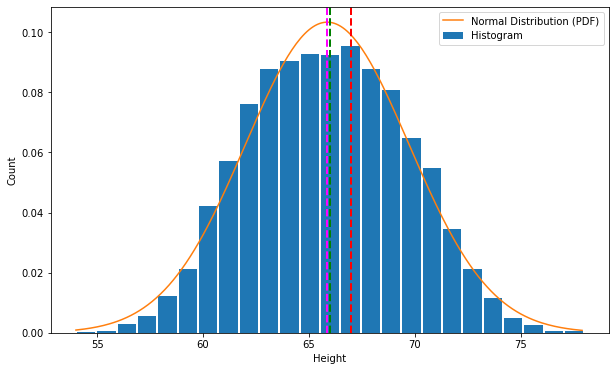

In [32]:
visualize_data(df['Height'])

In [33]:
n, xbins = np.histogram(df['Height'], bins=20)
for i in range(0, len(n)):
    print(f'Bin Border {i}, range: {xbins[i]} - {xbins[i+1]}, frekuensi: {n[i]}')

Bin Border 0, range: 54.0 - 55.2, frekuensi: 10
Bin Border 1, range: 55.2 - 56.4, frekuensi: 27
Bin Border 2, range: 56.4 - 57.6, frekuensi: 54
Bin Border 3, range: 57.6 - 58.8, frekuensi: 118
Bin Border 4, range: 58.8 - 60.0, frekuensi: 204
Bin Border 5, range: 60.0 - 61.2, frekuensi: 955
Bin Border 6, range: 61.2 - 62.4, frekuensi: 732
Bin Border 7, range: 62.4 - 63.6, frekuensi: 842
Bin Border 8, range: 63.6 - 64.8, frekuensi: 868
Bin Border 9, range: 64.8 - 66.0, frekuensi: 890
Bin Border 10, range: 66.0 - 67.2, frekuensi: 1802
Bin Border 11, range: 67.2 - 68.4, frekuensi: 844
Bin Border 12, range: 68.4 - 69.6, frekuensi: 776
Bin Border 13, range: 69.6 - 70.8, frekuensi: 623
Bin Border 14, range: 70.8 - 72.0, frekuensi: 526
Bin Border 15, range: 72.0 - 73.2, frekuensi: 533
Bin Border 16, range: 73.2 - 74.4, frekuensi: 111
Bin Border 17, range: 74.4 - 75.6, frekuensi: 47
Bin Border 18, range: 75.6 - 76.8, frekuensi: 26
Bin Border 19, range: 76.8 - 78.0, frekuensi: 12


## Outlier - stdev
Untuk normal distribution

In [34]:
df.Height.var()

14.901787738773884

In [35]:
df.Height.std()

3.8602833754497716

In [37]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.44705012634932

In [38]:
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

54.28534987365069

In [43]:
# Outlier
outlier_std = df[(df.Height > upper_limit) | (df.Height < lower_limit)]
outlier_std

,Gender,Height,Weight
994,Male,78,255
1317,Male,78,227
2014,Male,78,269
3285,Male,78,253
3757,Male,78,245
6624,Female,54,71
7294,Female,54,78
9285,Female,54,64


In [41]:
outlier_std.shape[0]

8

In [42]:
df.shape[0]

10000

In [44]:
df_no_outlier = df[~(df.Height > upper_limit) and ~(df.Height < lower_limit)]
df_no_outlier

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Outlier - z-score
Untuk normal distribution

In [45]:
df['z-score'] = (df.Height - df.Height.mean())/df.Height.std()
df.head()

,Gender,Height,Weight,z-score
0,Male,73,241,1.847999
1,Male,68,162,0.552757
2,Male,74,212,2.107047
3,Male,71,220,1.329902
4,Male,69,206,0.811806


In [46]:
df[df['z-score'] > 3] # batas atas

,Gender,Height,Weight,z-score
994,Male,78,255,3.143241
1317,Male,78,227,3.143241
2014,Male,78,269,3.143241
3285,Male,78,253,3.143241
3757,Male,78,245,3.143241


In [48]:
df[df['z-score'] < -3] # batas bawah

,Gender,Height,Weight,z-score
6624,Female,54,71,-3.073919
7294,Female,54,78,-3.073919
9285,Female,54,64,-3.073919


# Outlier - IQR
Untuk bukan normal distribution

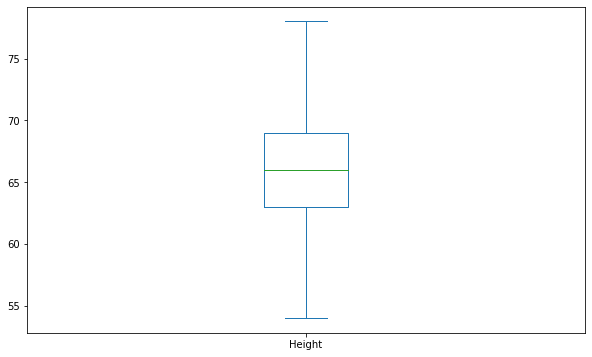

In [49]:
df['Height'].plot(kind='box', figsize=(10, 6))
plt.show()

In [50]:
q1 = df.Height.quantile(0.25)
q3 = df.Height.quantile(0.75)
q1,q3

(63.0, 69.0)

In [51]:
IQR = q3 - q1
IQR

6.0

In [52]:
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
lower_limit, upper_limit

(54.0, 78.0)

In [53]:
outlier_iqr = df[(df.Height > upper_limit) | (df.Height < lower_limit)]
outlier_iqr

,Gender,Height,Weight,z-score
